In [3]:
class Document(object):
    
    def __init__(self,id=None, title="", authors=[], venue='', year=None, n_citation=0, references =[], abstract ="", *args, **kwargs ):
        self.id = id
        self.title = title
        self.authors = authors
        self.venue = venue
        self.year = year
        self.n_citation = n_citation
        self.references = references
        self.abstract = abstract
    def __str__(self):
        return str(self.id)

    def __hash__(self):
        return hash(str(self))
    
    def __repr__(self):
        return str(self.id)
    

<Figure size 576x432 with 0 Axes>

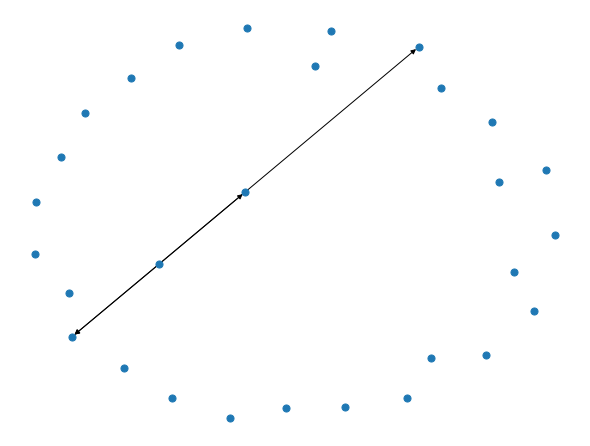

In [5]:
# importing networkx 
import networkx as nx 

import json 

from operator import itemgetter

# importing matplotlib.pyplot 
import matplotlib.pyplot as plt 

from numpy import random

# to display all outputs (not only the last one))
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import collections

import pandas as pd

import numpy as np

# to center figure on display
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")


def one(test):  
    return test[1:]

    
def two(test):  
    return test[5:]

    
    
# create an empty graph (DiGraph: directed graph)
G = nx.DiGraph()

# browse the file, extract each object of type "Document" and assign it to a node
with open('db_v9_example_edited_and_simplified.txt') as f:
    doc = Document()
    for line in f:
        if line != '\n':
            fields=line.split("#")
            if fields[1][0] == '%':
                doc.references.append(one(fields[1]))
                
            if fields[1][0] == '!':
                doc.abstract= one(fields[1])
            
            if fields[1][0] == '*':
                doc.title = one(fields[1])
                
            if fields[1][0] == '@':
                doc.authors = one(fields[1])
                
            if fields[1][0] == 't':
                doc.year = one(fields[1])
                
            if fields[1][0] == 'c':
                doc.venue = one(fields[1])
            
            if fields[1][0] == 'i':
                doc.id = two(fields[1])
            

        else:
#             print(doc)
            G.add_node(doc)
            doc = Document()
            doc.references = []

# add the links (edges between documents)
for node in G:
    if hasattr(node, 'references'):
        for i in node.references:
            for d in G:
                if (i == (d.id)) and (d != node):
                    d.n_citation = d.n_citation + 1
                    G.add_edge(node,d)
                    
# specify figure size
plt.figure(3,figsize=(8,6))                     
nx.draw(G,node_size=50)


{555036b37cea80f954149ffc: 0.033467216175944114,
 555036b37cea80f954149ffd: 0.04016064636847014,
 555036b37cea80f954149ffe: 0.04819258162475441,
 555036b37cea80f954149fff: 0.033467216175944114,
 555036b37cea80f95414a000: 0.033467216175944114,
 555036b37cea80f95414a001: 0.04149915143222839,
 555036b37cea80f95414a002: 0.033467216175944114,
 555036b37cea80f95414a003: 0.033467216175944114,
 555036b37cea80f95414a004: 0.033467216175944114,
 555036b37cea80f95414a005: 0.033467216175944114,
 555036b37cea80f95414a006: 0.033467216175944114,
 555036b37cea80f95414a007: 0.033467216175944114,
 555036b37cea80f95414a008: 0.033467216175944114,
 555036b37cea80f95414a009: 0.033467216175944114,
 555036b37cea80f95414a00a: 0.033467216175944114,
 555036b37cea80f95414a00b: 0.033467216175944114,
 555036b37cea80f95414a00c: 0.033467216175944114,
 555036b37cea80f95414a00d: 0.033467216175944114,
 555036b37cea80f95414a00e: 0.033467216175944114,
 555036b37cea80f95414a00f: 0.033467216175944114,
 555036b37cea80f95414a0

Enter a top number: 5


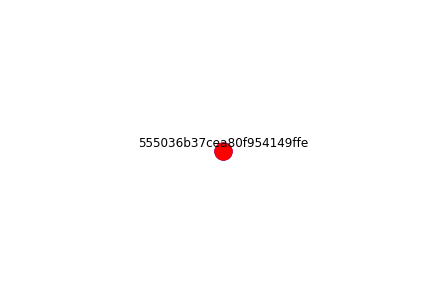

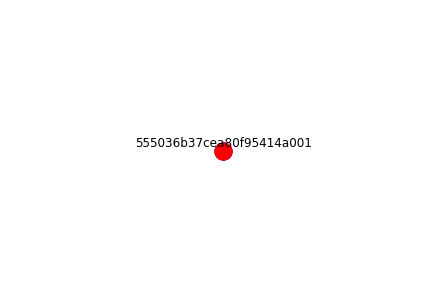

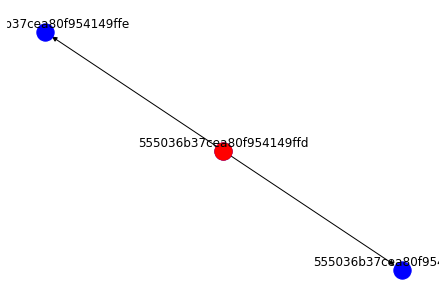

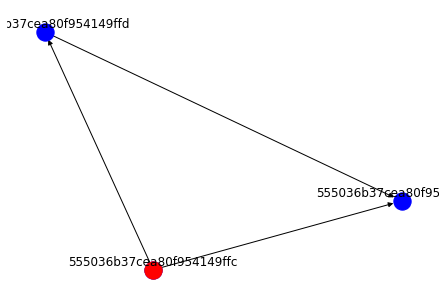

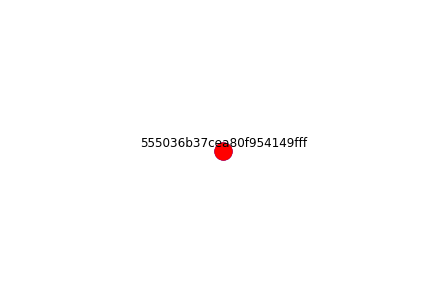

Le graph Ginf des 5 top noeuds


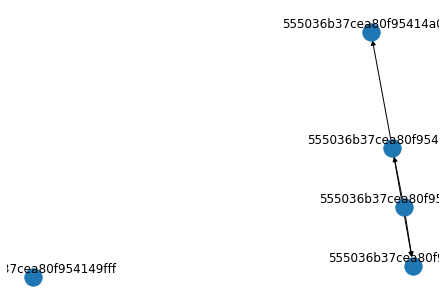

In [6]:
#Application of pr and construction of Ginf

# apply page rank algorithm
pr=nx.pagerank(G,0.4) 
pr


# function that return the "nb" top first elements
def sort_top(pr,top_nb):
    sorted_pr = sorted(pr.items(), key=lambda kv: kv[1], reverse=True)
    sorted_top =[]
    for i in range(top_nb):
        sorted_top.append(sorted_pr[i])
        
    return sorted_top



# Declare Ginf graph
Ginf = nx.DiGraph()


    
nb = int(input('Enter a top number: '))        
        
#sort pr: returns the nb top pr
test = sort_top(pr,nb)        

for i in range(nb):

    # Create ego graph
    # When unidirected=False : only successors of the nodes are drawn
    # When unidirected=True : successors and predecessors of the nodes are drawn
    hub_ego=nx.ego_graph(G,test[i][0],undirected=False)

    #Update Ginf graph
    Ginf.update(hub_ego)

    # Draw graph ego
    pos=nx.spring_layout(hub_ego)
    nx.draw(hub_ego,pos,node_color='b',node_size=300,with_labels=True)

    # Draw ego as large and red
    nx.draw_networkx_nodes(hub_ego,pos,nodelist=[test[i][0]],node_size=300,node_color='r')
    plt.show()
            
print('Le graph Ginf des ' + str(nb) +' top noeuds')
nx.draw(Ginf,with_labels=True)
plt.show()



In [7]:
# return titles by author
def search_by_author(g,author):
    titles=[]
    for node in g:
        if hasattr(node, 'authors') and author in node.authors and (not node.title in titles):
            titles.append(node.title)
    return titles

# return titles by multiple authors
def search_by_authors(g,authors):
    titles=[]
    for node in g:
        if hasattr(node, 'authors'):
            for author in authors:
                if (author in node.authors) and (not node.title in titles):
                    titles.append(node.title)
    return titles

# return all titles
def search_titles(g):
    titles=[]
    for node in g:
        if hasattr(node, 'title'):
            if not node.title in titles:
                titles.append(node.title)
    return titles

#return all authors
def search_authors(g):
    authors=[]
    for node in g:
        if hasattr(node, 'authors'):
            authors.append(node.authors)
    return authors

def search_venues(g):
    venues=[]
    for node in g:
        if hasattr(node, 'venue'):
            if not node.venue in venues:
                venues.append(node.venue)
    return venues

#return all abstracts
def search_abstracts(g):
    abstracts=[]
    for node in g:
        if hasattr(node, 'abstract') and (not node.abstract in abstracts):
            abstracts.append(node.abstract)
    return abstracts


# sort by citation number
def sort_by_citation_number(g):
    documents =[]
    for node in g:
        if hasattr(node, 'n_citation'):
            documents.append(node)
    documents.sort(key=lambda x: x.n_citation, reverse=True)
    print("\nLe tri des documents selon le nombre des n_citation descendant:")
    return documents



# titles = search_titles(Ginf)
# print("Les titres de ce Ginf sont:")
# print(titles)

# authors = search_authors(Ginf)
# print(authors)

# authors = ["Christian Wulff-Nilsen"]
# titles = search_by_authors(Ginf,authors)
# print("\nLes titres réalisés par les auteurs en entrée:")
# print(titles)


# abstracts = search_abstracts(Ginf)
# print(abstracts)



sorted_documents=sort_by_citation_number(Ginf)
print(sorted_documents) # the numbers are the ids of documents


Le tri des documents selon le nombre des n_citation descendant:
[555036b37cea80f954149ffe
, 555036b37cea80f954149ffd
, 555036b37cea80f95414a001
, 555036b37cea80f954149ffc
, 555036b37cea80f954149fff
]


In [8]:
#Application of LDA model

from nltk.tokenize import sent_tokenize

import gensim
from gensim import corpora, models
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *

import numpy as np
np.random.seed(2018)
import nltk
nltk.download('punkt')
nltk.download('wordnet')

# initializing stemmer
stemmer = SnowballStemmer('english')

abstracts = search_abstracts(Ginf)

print(abstracts)

# convert abstracts into dict with one key in order to apply lda algorithm
# the key here is: "abstract"
documents = {"abstracts": abstracts[0:]}

print(len(documents))

# Certain parts of English speech, like conjunctions (“for”, “or”) or the word “the” are meaningless to a topic model.
# These terms are called stop words and need to be removed from our token list.
# function that lematizes and stemms
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

# Tokenization segments a document into its atomic elements. (into words)
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

processed_docs = list(map(preprocess,documents['abstracts']))


# print the first 4 preprocessed elements
print(processed_docs[:4])

# Create a dictionary from ‘processed_docs’ containing the number of times a word appears in the training set.
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

#Filter out tokens
dictionary.filter_extremes(no_below=0)

#transform our dict into a bag of words
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

# display occurence of words in every document
for doc in bow_corpus:
    for i in range(len(doc)):
        print("Word {} (\"{}\") appears {} time.".format(doc[i][0], 
                                               dictionary[doc[i][0]],doc[i][1]))



[nltk_data] Downloading package punkt to /home/midovsky/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

[nltk_data] Downloading package wordnet to /home/midovsky/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

['', 'Example of abstract added by me\n']
1
[[], ['exampl', 'abstract', 'add']]
0 abstract
1 add
2 exampl
Word 0 ("abstract") appears 1 time.
Word 1 ("add") appears 1 time.
Word 2 ("exampl") appears 1 time.


In [9]:
# apply lda model
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=4, id2word=dictionary, passes=20)

# num_words: number of relevant words in every topic
for idx, topic in lda_model.print_topics(num_words=5): #or -1 as parameter
    print('Topic: {} \nWords: {}'.format(idx, topic))
    
# To print the % of topics a document is about, do the following:
lda_model[bow_corpus[1]] # bow_corpus[0] means the first document.

Topic: 0 
Words: 0.333*"add" + 0.333*"exampl" + 0.333*"abstract"
Topic: 1 
Words: 0.333*"abstract" + 0.333*"exampl" + 0.333*"add"
Topic: 2 
Words: 0.333*"add" + 0.333*"exampl" + 0.333*"abstract"
Topic: 3 
Words: 0.333*"exampl" + 0.333*"add" + 0.333*"abstract"


[(0, 0.06324711), (1, 0.8102577), (2, 0.06324767), (3, 0.063247494)]

In [10]:
# to display the topics of all documents
for doc in bow_corpus:
    lda_model[doc]

[(0, 0.25), (1, 0.25), (2, 0.25), (3, 0.25)]

[(0, 0.06325006), (1, 0.8102517), (2, 0.06324813), (3, 0.06325014)]

In [11]:
# print the topic number + percentage
print(lda_model.print_topics(num_topics=3, num_words=3))

[(2, '0.333*"add" + 0.333*"exampl" + 0.333*"abstract"'), (3, '0.333*"exampl" + 0.333*"add" + 0.333*"abstract"'), (0, '0.333*"add" + 0.333*"exampl" + 0.333*"abstract"')]


In [12]:
# to check where a document can be classified
for index, score in sorted(lda_model[bow_corpus[1]], key=lambda tup: -1*tup[1]): # exemple doc num 1
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.8102579712867737	 
Topic: 0.333*"abstract" + 0.333*"exampl" + 0.333*"add"

Score: 0.06324750930070877	 
Topic: 0.333*"exampl" + 0.333*"add" + 0.333*"abstract"

Score: 0.06324733793735504	 
Topic: 0.333*"add" + 0.333*"exampl" + 0.333*"abstract"

Score: 0.06324713677167892	 
Topic: 0.333*"add" + 0.333*"exampl" + 0.333*"abstract"
